# Gerekli Kütüphaneler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ARDRegression as SKARDRegression
from sklearn import datasets

seed = 42
np.random.seed(seed)

# Veri Seti

In [2]:
X, y = datasets.make_regression(
    n_samples=200,
    n_features=1,
    noise=15,
    random_state=seed
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

# ARD Regression

In [4]:
class ARDRegression:
    def __init__(self, n_iter=300, tol=1e-3):
        self.n_iter = n_iter
        self.tol = tol
        # Agirlik hassasiyeti
        self.alpha_ = None
        # Bias hassasiyeti
        self.beta_ = None
        # Agirlik
        self.w_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha_ = np.ones(n_features)
        self.beta_ = 1.0

        # Agirliklar ve kovaryans matrixi baslatilir.
        self.w_ = np.zeros(n_features)
        sigma = np.eye(n_features)

        for i in range(self.n_iter):
            # Agirlik guncellenir.
            sigma_inv = np.diag(self.alpha_) + self.beta_ * np.dot(X.T, X)
            sigma = np.linalg.inv(sigma_inv)
            self.w_ = self.beta_ * sigma @ X.T @ y

            gamma = 1 - self.alpha_ * np.diag(sigma)
            self.alpha_ = gamma / (self.w_ ** 2 + self.tol)

            y_pred = X @ self.w_
            error = np.sum((y - y_pred) ** 2)
            self.beta_ = n_samples / (error + self.tol)

            if np.linalg.norm(self.w_ - self.beta_ * sigma @ X.T @ y) < self.tol:
                break

    def predict(self, X):
        return np.dot(X, self.w_)

# Eğitim

In [5]:
ard = ARDRegression()
ard.fit(X_train, y_train)

# Tahmin

In [6]:
y_pred = ard.predict(X_test)

In [8]:
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: 0.9721881045880684


In [9]:
print("MSE Score:", mean_squared_error(y_test, y_pred))

MSE Score: 171.42510660308713


# Sonuçlar

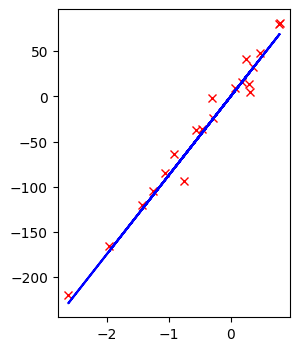

In [10]:
plt.figure(figsize=(3, 4))
plt.plot(X_test, y_test, "rx")
plt.plot(X_test, y_pred, "b")
plt.show()

# Scikit-Learn

In [11]:
ard2 = SKARDRegression()
ard2.fit(X_train, y_train)

ARDRegression()

In [12]:
y_pred_2 = ard2.predict(X_test)

In [13]:
print("R^2 Score:", r2_score(y_test, y_pred_2))

R^2 Score: 0.974173391896333


In [14]:
print("MSE Score:", mean_squared_error(y_test, y_pred_2))

MSE Score: 159.1883250599268
